### Imports

In [19]:
import pandas as pd
from logger import logger

### Loading data

In [11]:
df_lidar = pd.read_table('../training_data/lidar_2rounds', sep=",", index_col=0)
df_lidar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7.4565,6.8632,8.4021,10.2755,12.9451,9.7520,5.7550,5.8843,3.9540,20.0,20.0,5.2561,2.7631,4.3158,5.5333,1.4624,-32.0
1,7.4570,6.8637,8.4026,10.2759,12.9455,9.7523,5.7554,5.8845,3.9542,20.0,20.0,5.2564,2.7635,4.3162,5.5337,1.4628,-32.0
2,7.4565,6.8633,8.4022,10.2756,12.9452,11.2514,5.7551,5.8844,20.0000,20.0,20.0,5.2560,2.7631,4.3157,5.5332,1.4624,-32.0
3,7.4554,6.8621,8.4012,10.2746,12.9443,11.2507,5.7545,5.8839,20.0000,20.0,20.0,5.2550,2.7620,4.3146,5.5320,1.4612,-32.0
4,7.4533,6.8601,8.3994,10.2729,12.9429,11.2495,5.7534,5.8832,20.0000,20.0,20.0,5.2533,2.7600,4.3126,5.5299,1.4590,-32.0


In [12]:
df_sonar = pd.read_csv('../training_data/sonar.samples', sep=" ", header=None)
df_sonar.head()

,0,1,2,3
0,1.5067,1.3101,1.7966,-22.0
1,1.5075,1.3106,1.7970,-22.0
2,1.5075,1.3106,1.7970,-22.0
3,1.5075,1.3106,1.7970,-22.0
4,1.5075,1.3106,1.7970,-22.0


In [13]:
display(df_lidar.describe())
df_sonar.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.0,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,10.693885,8.967424,9.769526,8.566755,9.177894,7.244609,8.707776,7.357612,14.008577,20.0,16.453719,14.921087,15.125725,14.501483,13.905103,11.930902,2.303507
std,7.652275,7.376931,7.386916,7.180727,7.311107,6.133312,6.572315,5.748568,6.605551,0.0,6.392659,7.513922,7.336148,7.803161,7.936621,8.340058,13.854609
min,0.414600,0.525200,0.523800,0.618800,0.511600,0.417700,0.375900,0.339300,0.322900,20.0,0.361900,0.196700,0.209900,0.225400,0.181100,0.261600,-54.500000
25%,3.681450,3.221025,3.645825,2.777900,2.713675,3.079200,3.745200,3.610550,7.569425,20.0,20.000000,6.336300,6.655275,5.550175,5.495475,3.033000,-2.500000
50%,7.083500,5.242600,6.477100,5.751850,6.973350,5.057700,6.604600,5.511900,15.596000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.500000
75%,20.000000,20.000000,20.000000,20.000000,20.000000,9.314150,11.631475,8.917025,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,7.500000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,53.000000


,0,1,2,3
count,5920.000000,5920.000000,5.920000e+03,5920.000000
mean,1.885385,1.540811,8.445946e+16,3.326014
std,0.386761,0.570198,2.905209e+18,10.068282
min,0.543400,0.360300,6.499000e-01,-22.000000
25%,1.655500,1.288975,1.034200e+00,0.000000
50%,1.854600,1.497100,1.169600e+00,0.000000
75%,2.084300,1.698600,1.328225e+00,0.000000
max,3.253800,7.921100,1.000000e+20,22.000000


### Preprocessing data

In [14]:
# build pipeline to find duplicates, count them and remove them and to normalize the data between 0 and 1

duplicates_lidar = len(df_lidar[df_lidar.duplicated()])
duplicates_sonar = len(df_sonar[df_sonar.duplicated()])

print(f"# of duplicates found:\nLidar: {duplicates_lidar} of {len(df_lidar)} items\nSonar: {duplicates_sonar} of {len(df_sonar)} items")
 

# of duplicates found:
Lidar: 330 of 3308 items
Sonar: 4182 of 5920 items


In [15]:
lidar_no_dup = df_lidar[~df_lidar.duplicated()]
sonar_no_dup = df_sonar[~df_sonar.duplicated()]

len(lidar_no_dup)

2978

### Neural Net class

In [22]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.utils.data as tud
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import mlflow

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

class Dataset(tud.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data):
            'Initialization'
            self.data = torch.tensor(np.array(data))    

    def __len__(self):
            'Denotes the total number of samples'
            return len(self.data)

    def __getitem__(self, index):
            'Generates one sample of data'
            # Select sample
            sample = self.data[index]

            # return x and y
            X = sample[:-1]
            y = sample[-1]
            return X.to(torch.float32), y.to(torch.float32)

class NeuralNet:
    def __init__(self, hidden_layers, sensor, epochs, lr, batch_size, batchnorm=True, relu=True) -> None:
        self.hidden_layers = hidden_layers
        self.sensor = sensor
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
        self.batchnorm = batchnorm
        self.relu = relu
        self.model = self.create_model()
        

    def create_model(self):
        model = nn.Sequential()
        for i, j in enumerate(self.hidden_layers):
            if i != (len(self.hidden_layers) - 1):
                model.add_module(f"linear_{i+1}", nn.Linear(j[0], j[1]))
                if self.batchnorm == True:
                    model.add_module(f"batch_norm_{i+1}", nn.BatchNorm1d(j[1]))
                if self.relu == True:
                    model.add_module(f"relu_{i+1}", nn.ReLU())
            else:
                model.add_module(f"linear_{i+1}", nn.Linear(j[0], j[1]))
        return model
    
    def train(self, filename):
        if self.sensor == "lidar":
            self.data = lidar_no_dup
        else:
            self.data = sonar_no_dup
        print("Training...")
        train_dataset = Dataset(self.data)

        train_loader = tud.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        criterion = nn.MSELoss()
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)
        self.model.train()

        mse_list = []
        for epoch in tqdm(range(self.epochs)):
            # print(f"##### EPOCH {epoch} #####")
            losses = []
            for i, (x, y) in enumerate(iter(train_loader)):
                optimizer.zero_grad()
                outputs = self.model(x.to(DEVICE))
                loss = criterion(outputs, y.reshape(-1, 1).to(DEVICE))
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
            loss_avg = sum(losses) / len(losses)
            # print(loss_avg)
            mse_list.append(loss_avg)

        fig, ax = plt.subplots(figsize=(15, 6))

        ax.set(xlabel='epochs', ylabel='MSE', title='Gradient Descent')

        ax.plot(range(self.epochs), mse_list, 'blue')
        
        plt.savefig(f'../loss_graphs/{filename}.png')
        # plt.show()
        
        return mse_list

    def save_model(self, filename):
        # open a file, where you ant to store the data
        file = open(f'../models/{filename}.pickle', 'wb')

        # dump information to that file
        pickle.dump(self.model, file)

        # close the file
        file.close()

cuda


### Training

In [23]:
# hyperparameters
hidden_layers_list = [
    [[16, 64], [64, 64], [64, 128], [128, 1]],
    [[16, 64], [64, 128], [128, 1]],
    [[16, 64], [64, 1]],
    [[16, 32], [32, 64], [64, 128], [128, 1]],
    [[16, 32], [32, 128], [128, 1]],
    [[16, 32], [32, 1]],
    [[16, 16], [16, 32], [32, 64], [64, 1]],
    [[16, 16], [16, 32], [32, 1]],
    [[16, 16], [16, 1]],
]
sensor_list = ["lidar"]
epochs_list = [150, 300, 450]
lr_list = [0.0001, 0.000075, 0.00001, 0.0000075]
batch_size_list = [50, 100, 200]
batchnorm_list = [True, False]
relu_list = [True, False]

[19/Apr/2023 17:59:30] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:20<00:00,  7.36it/s]
2023/04/19 17:59:51 INFO mlflow.tracking.fluent: Experiment with name 'Autonomous driving of a car' does not exist. Creating a new experiment.


[19/Apr/2023 17:59:51] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:14<00:00, 10.26it/s]


[19/Apr/2023 18:00:05] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:18<00:00,  8.33it/s]


[19/Apr/2023 18:00:24] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:17<00:00,  8.49it/s]


[19/Apr/2023 18:00:41] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 13.16it/s]


[19/Apr/2023 18:00:53] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.29it/s]


[19/Apr/2023 18:01:04] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 13.13it/s]


[19/Apr/2023 18:01:15] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 0.0001, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.48it/s]


[19/Apr/2023 18:01:26] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:14<00:00, 10.66it/s]


[19/Apr/2023 18:01:40] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:13<00:00, 11.09it/s]

[19/Apr/2023 18:01:54] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 100


Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:15<00:00,  9.60it/s]


[19/Apr/2023 18:02:10] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:14<00:00, 10.36it/s]


[19/Apr/2023 18:02:24] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 15.45it/s]


[19/Apr/2023 18:02:34] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 13.25it/s]


[19/Apr/2023 18:02:45] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 13.80it/s]


[19/Apr/2023 18:02:56] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 1e-05, batchsize: 200
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.68it/s]


[19/Apr/2023 18:03:07] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 7.5e-06, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:13<00:00, 11.27it/s]


[19/Apr/2023 18:03:20] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 7.5e-06, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:14<00:00, 10.41it/s]


[19/Apr/2023 18:03:35] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 7.5e-06, batchsize: 100
Training...


100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:15<00:00,  9.78it/s]


[19/Apr/2023 18:03:50] INFO - Running process for Neural Net (lidar) | layers: 4, epochs: 150, lr: 7.5e-06, batchsize: 100
Training...


 25%|████████████████████▏                                                             | 37/150 [00:04<00:14,  8.05it/s]


KeyboardInterrupt: 

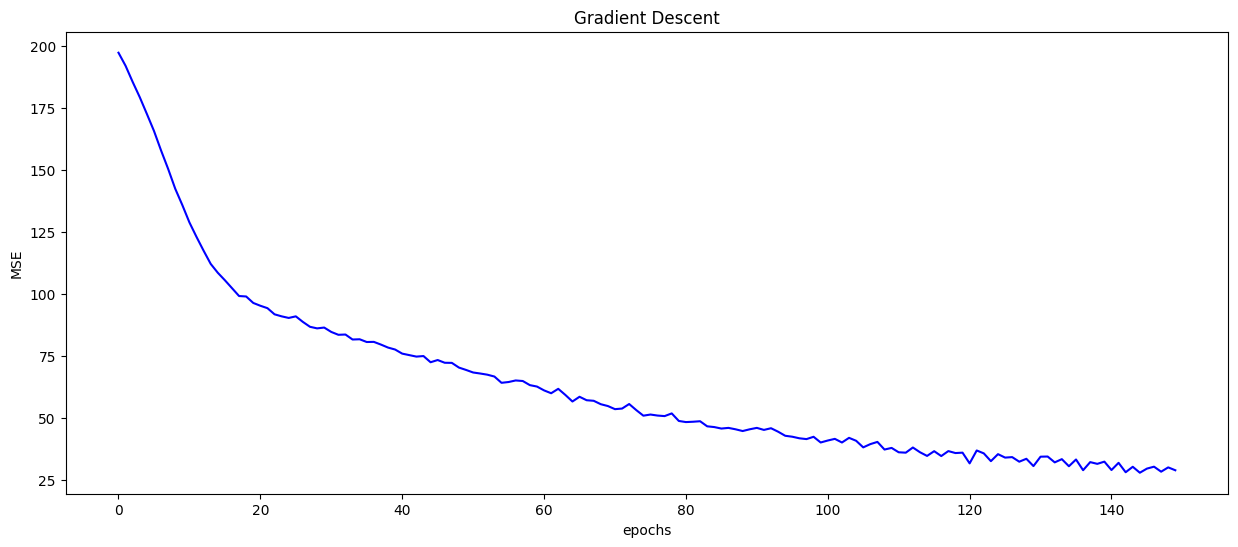

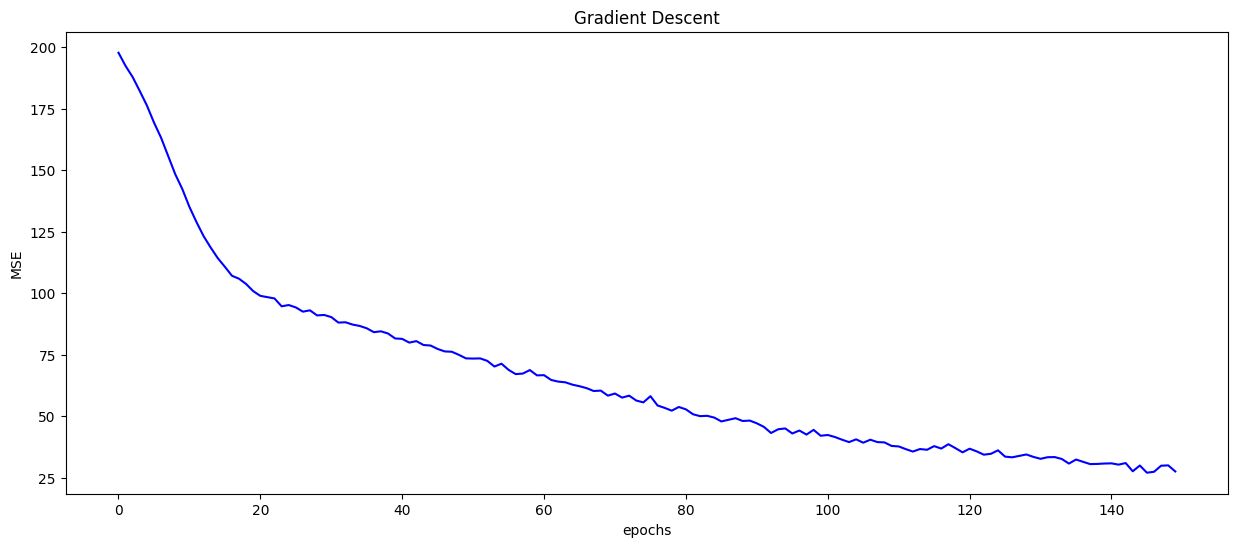

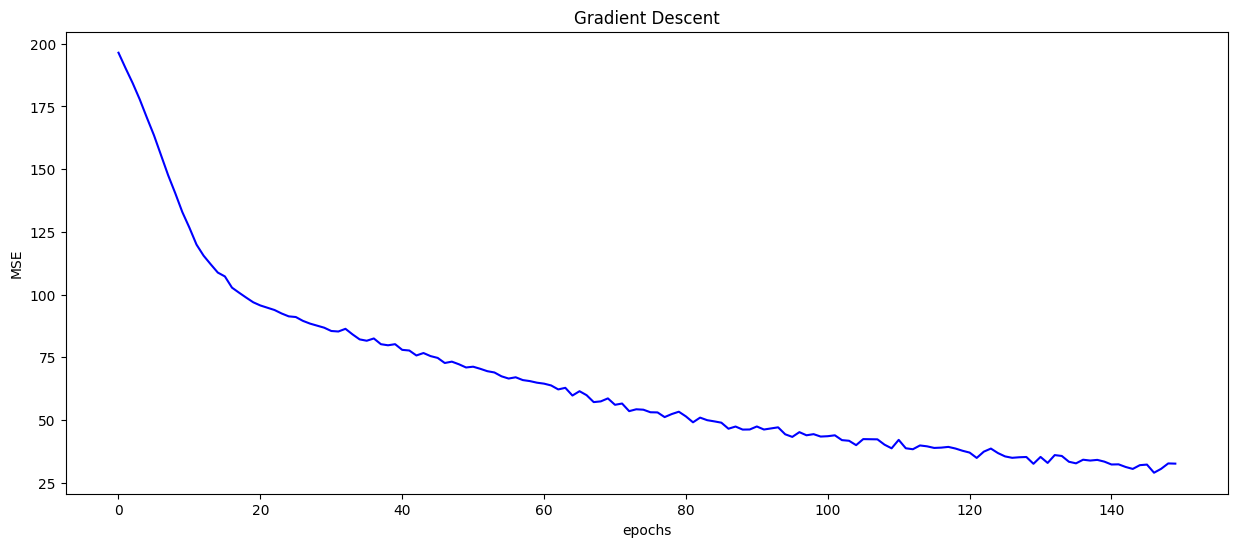

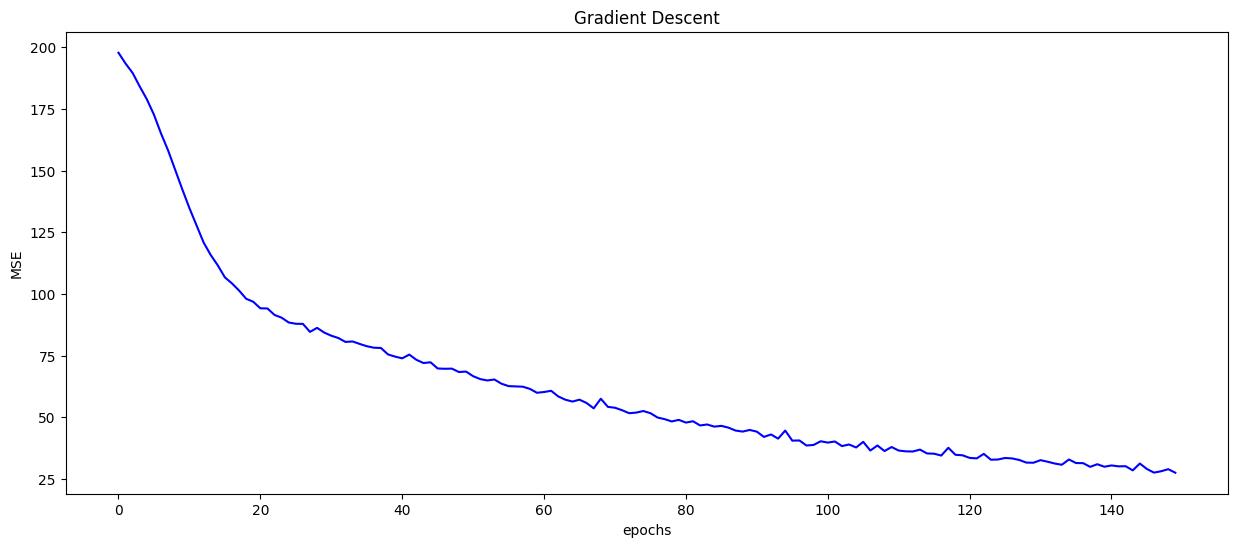

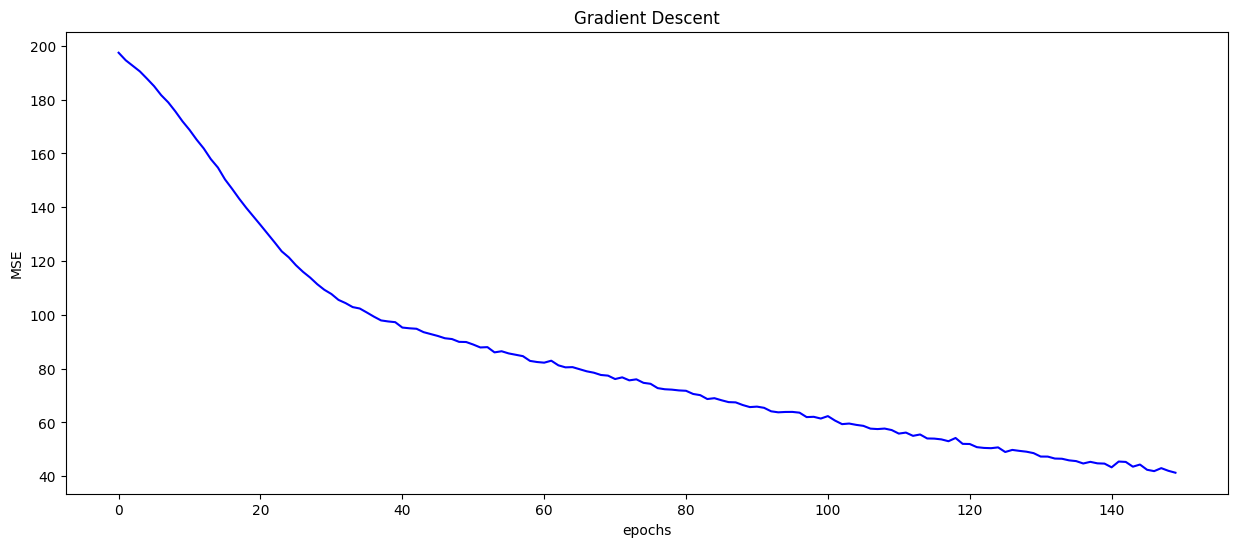

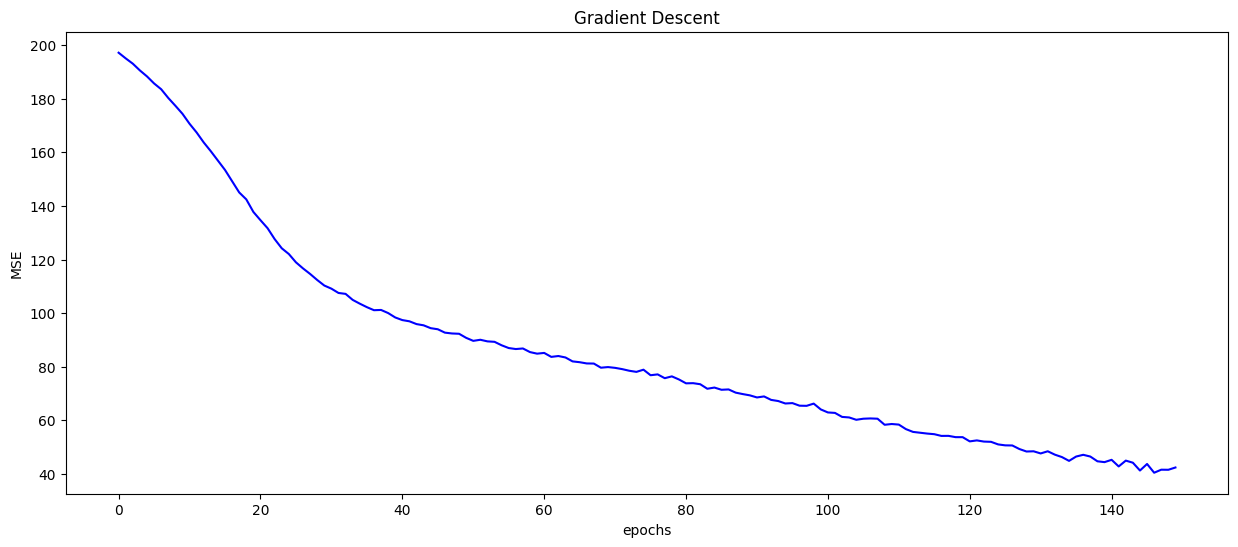

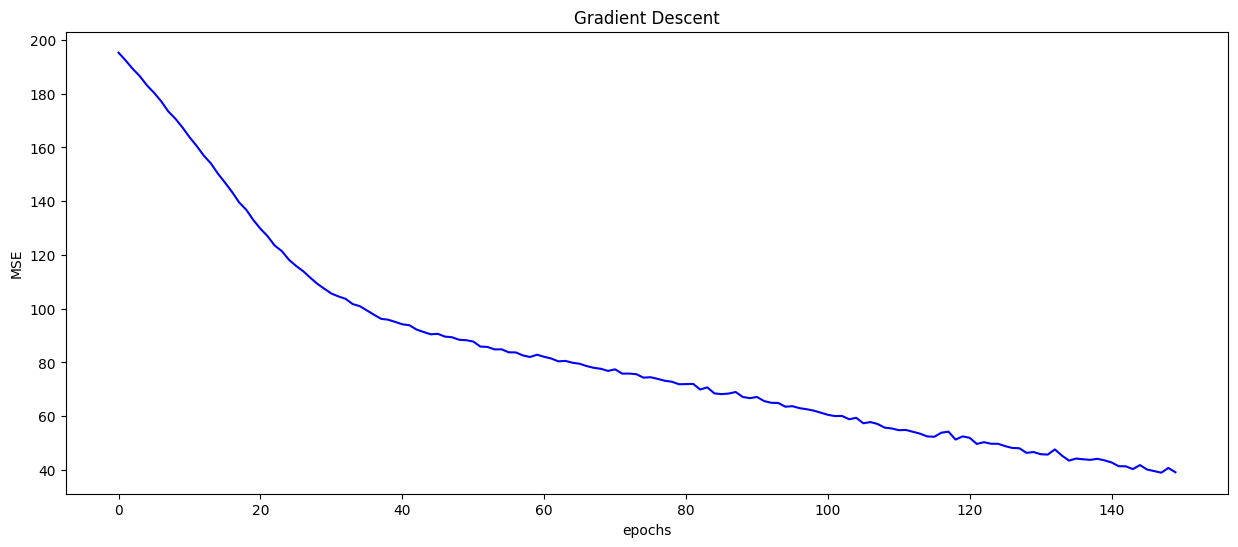

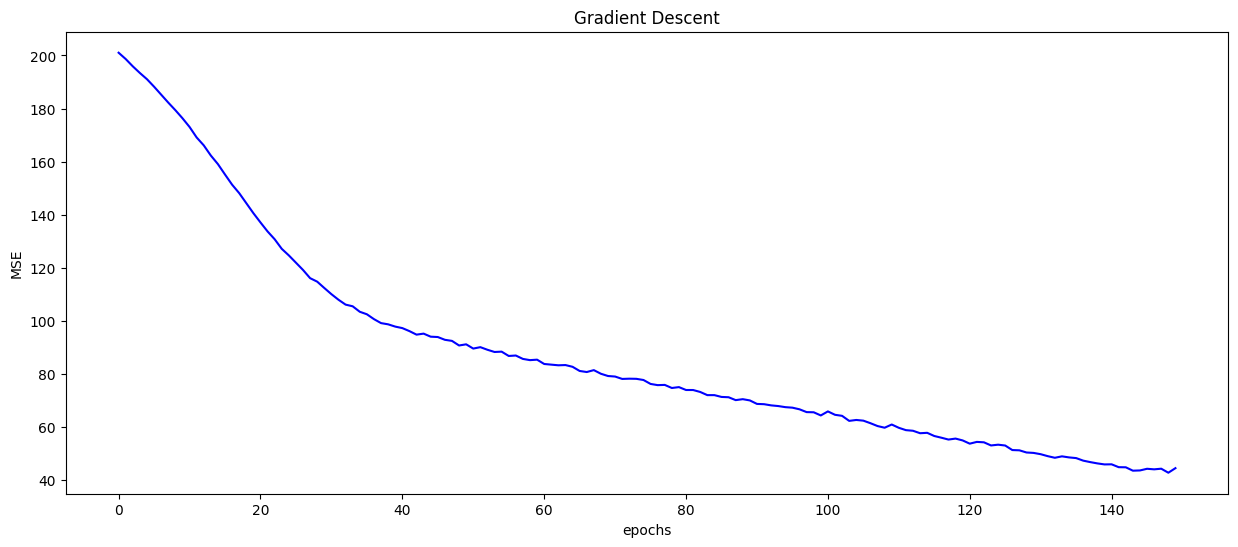

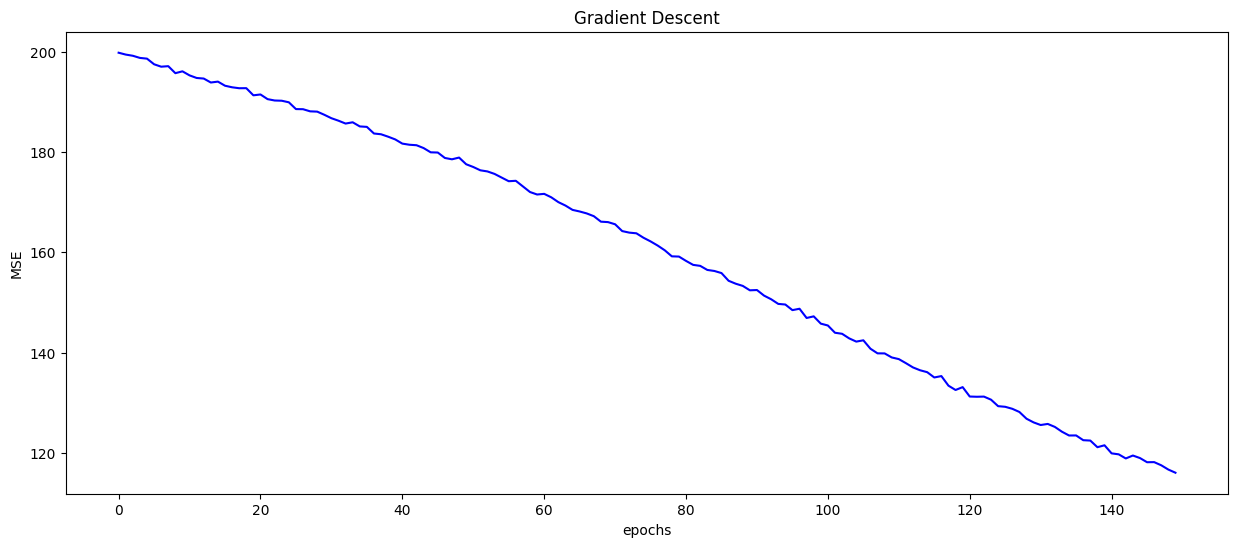

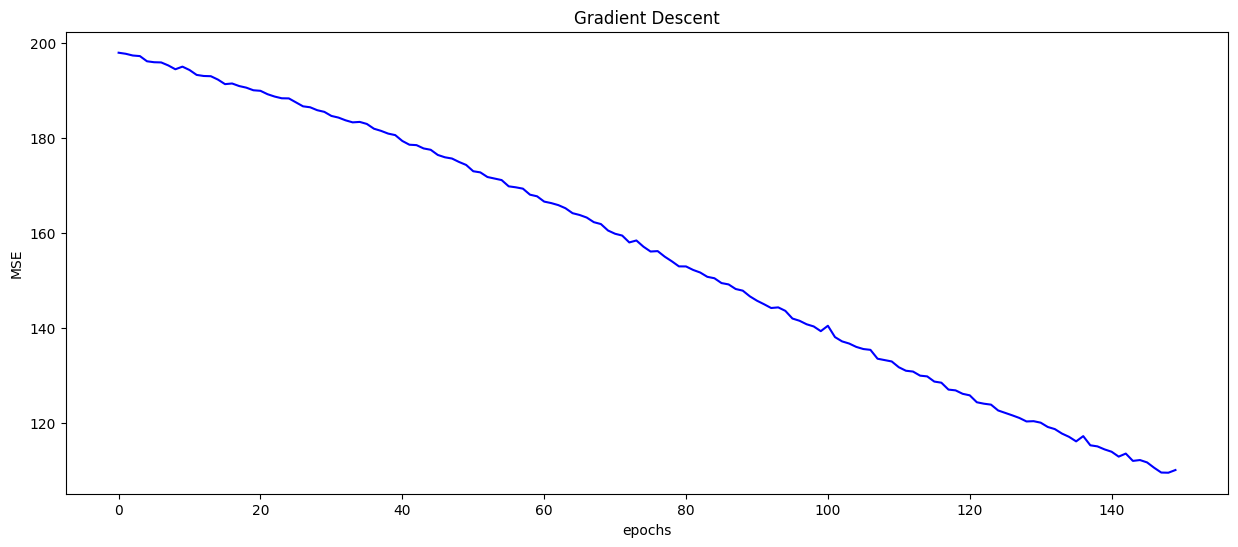

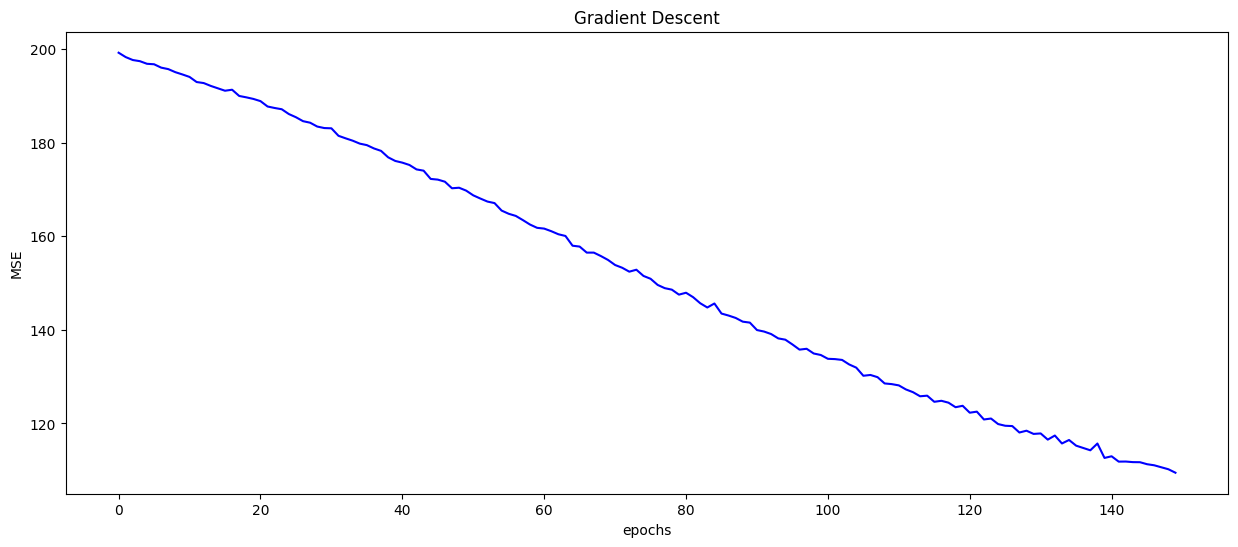

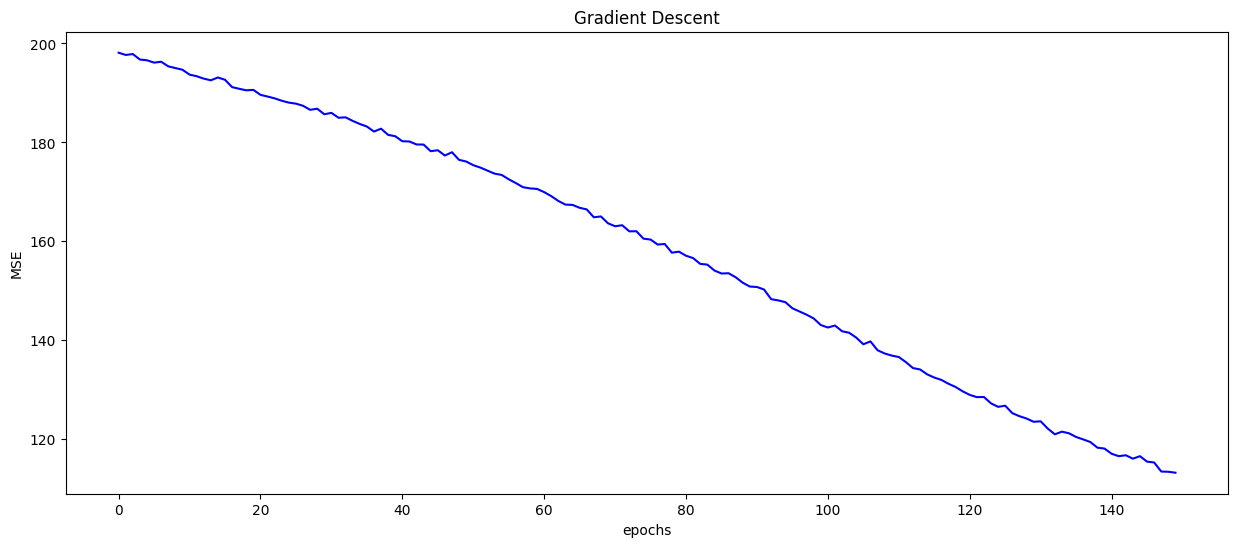

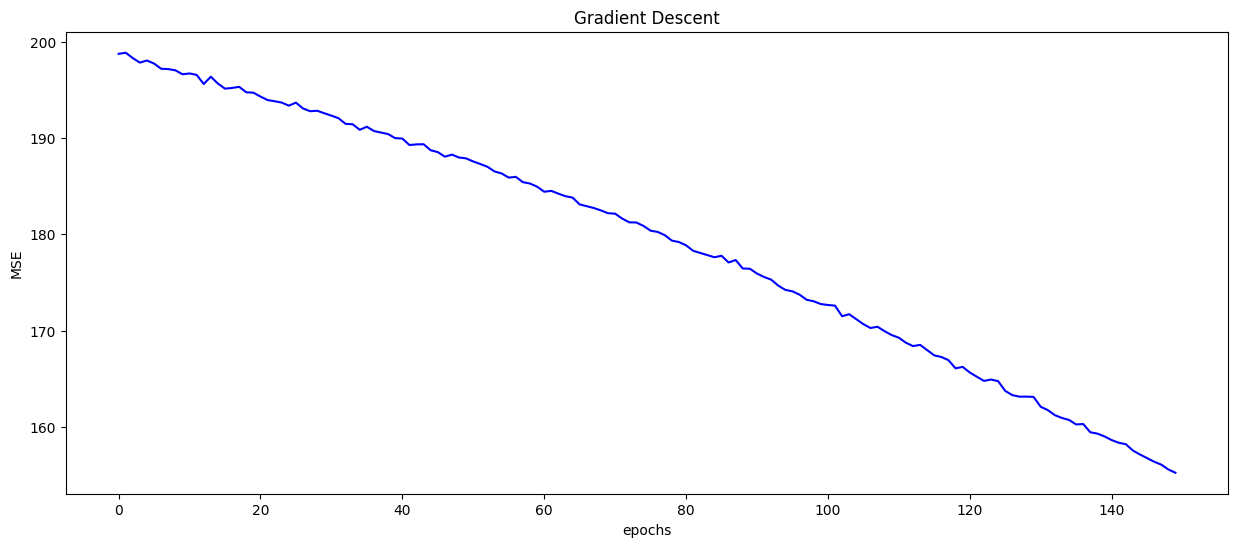

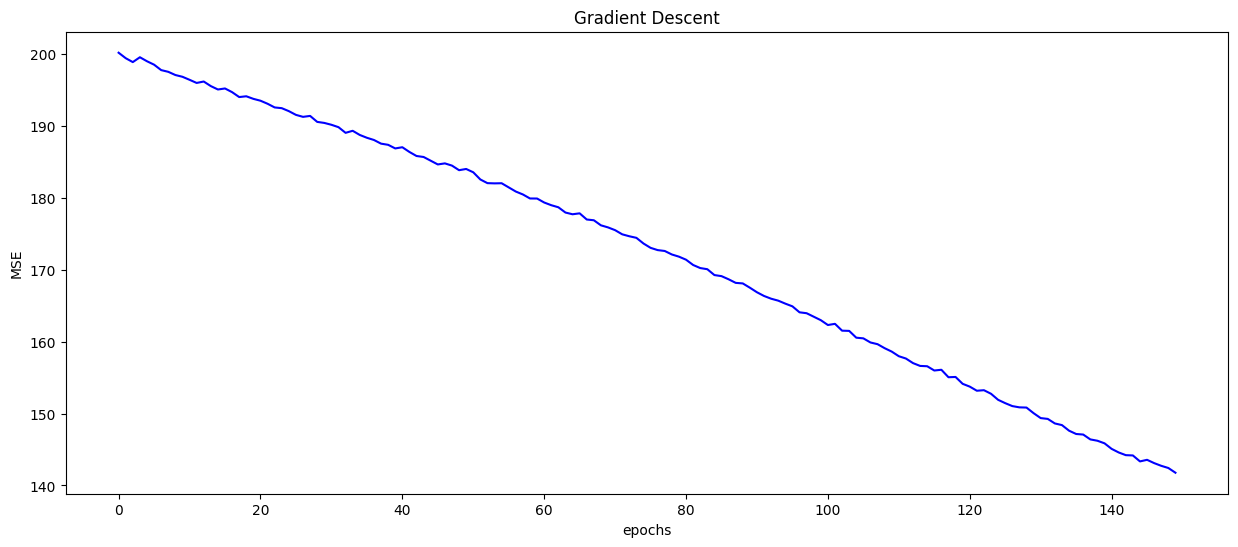

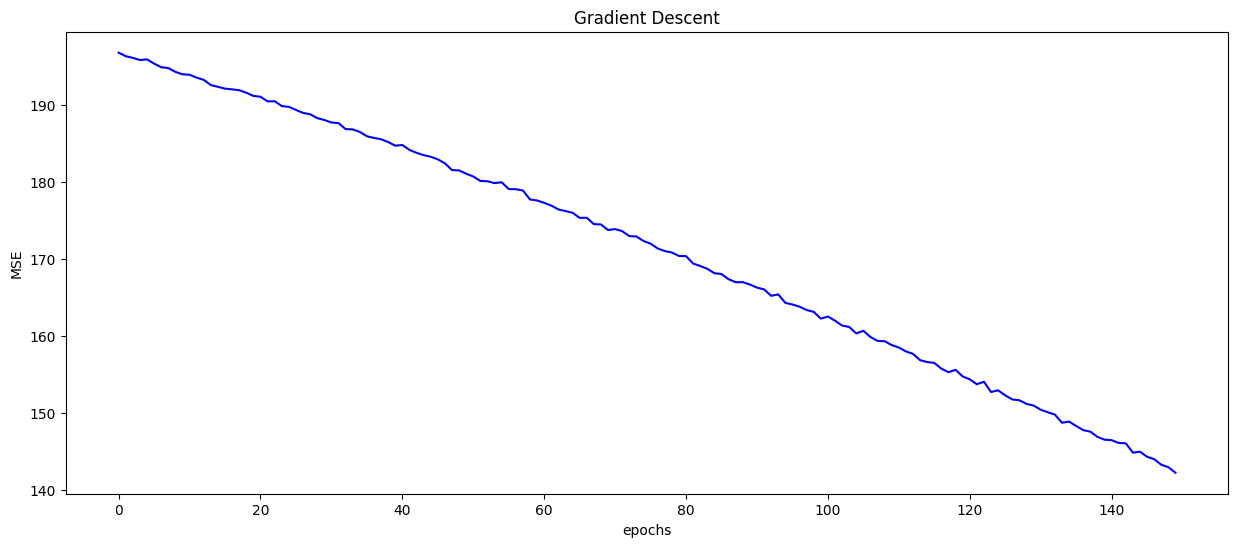

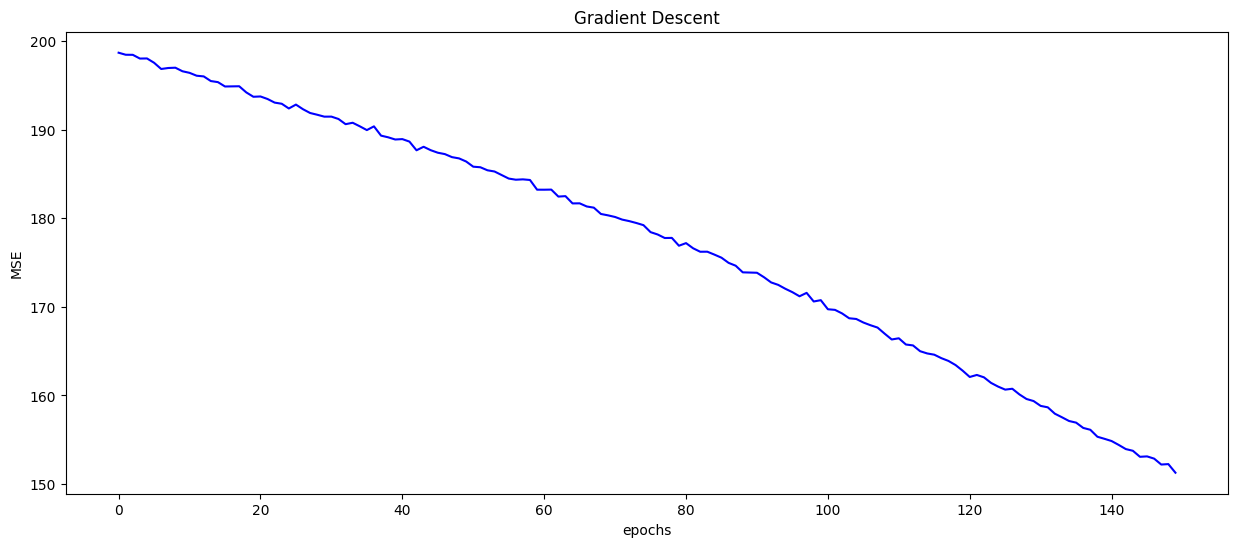

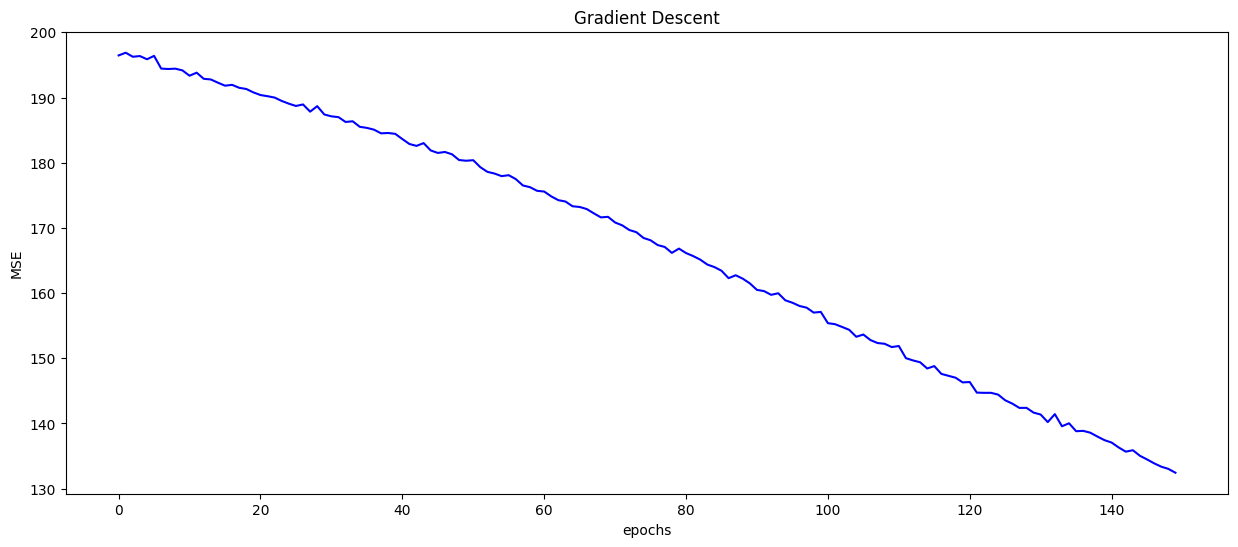

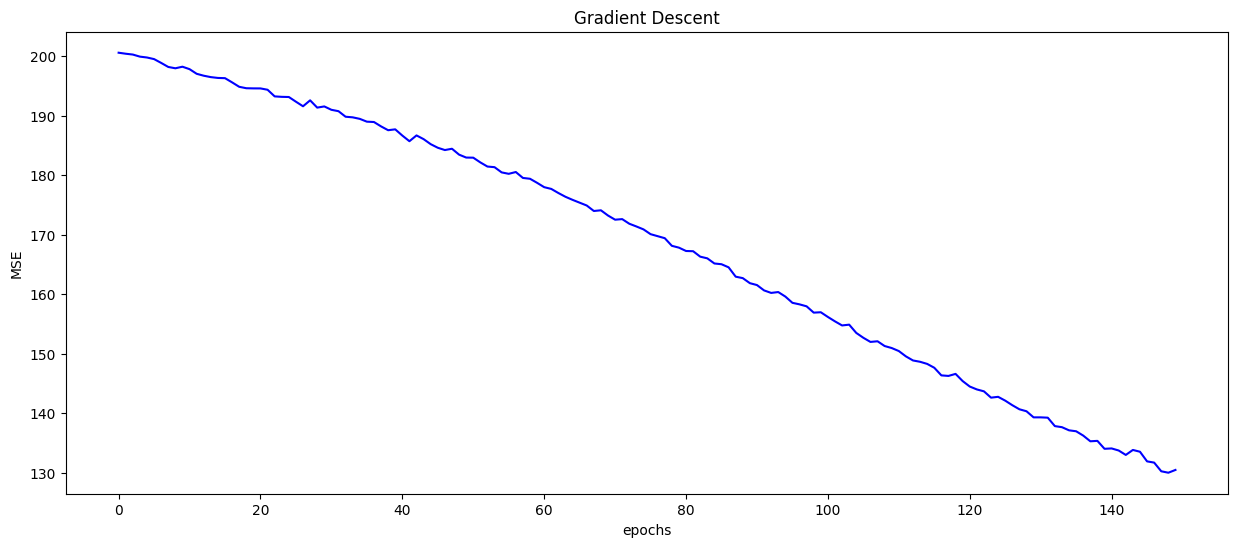

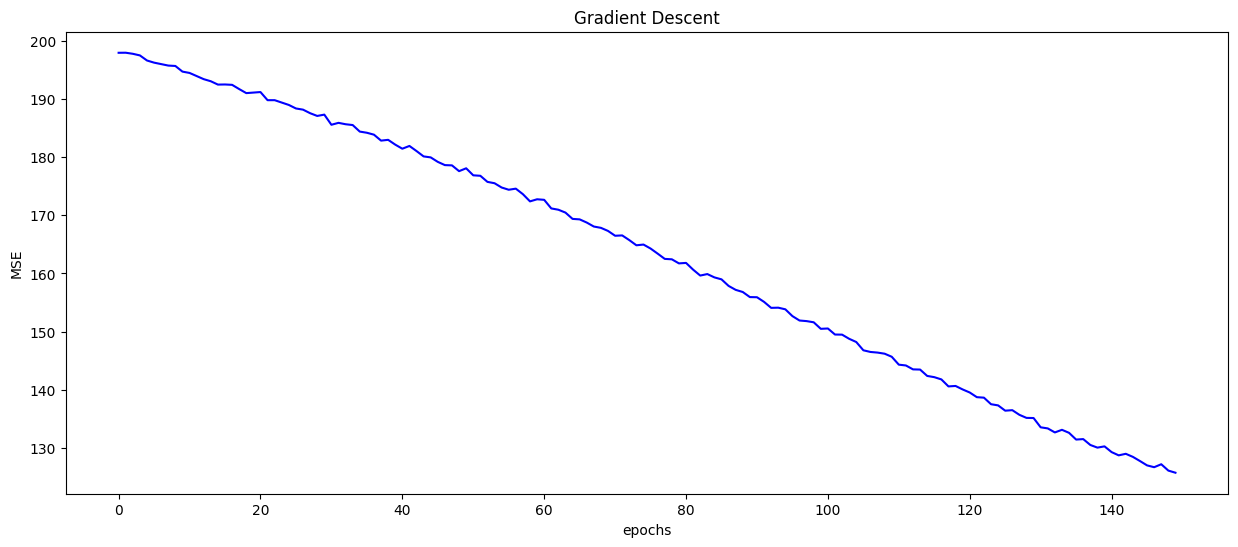

In [26]:
# loop over all possibilities
for sensor in sensor_list:
    for hidden_layers in hidden_layers_list:
        for epochs in epochs_list:
            for lr in lr_list:
                for batch_size in batch_size_list:
                    for batchnorm in batchnorm_list:
                        for relu in relu_list:
                            if sensor == "sonar":
                                hidden_layers[0][0] = 3
                            # get hidden layers string
                            hidden_layers_str = ""
                            for layer in hidden_layers[:-1]:
                                hidden_layers_str += f"{str(layer[1])}_"

                            # get notebook_str
                            notebook_str = f"nn_{sensor}_layers_{len(hidden_layers)}_{hidden_layers_str}epochs_{epochs}_lr_{str(lr)[2:]}_batchsize_{batch_size}"

                            if batchnorm:
                                notebook_str += "_batchnorm"
                            if relu:
                                notebook_str += "_relu"
                            
                            logger.info(f'Running process for Neural Net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}')
                                                        
                            # create network
                            neural_net = NeuralNet(hidden_layers, sensor, epochs, lr, batch_size)
                            # send network to GPU
                            neural_net.model.to(DEVICE)
                            # train network
                            mse = neural_net.train(notebook_str)
                            # save model
                            neural_net.save_model(notebook_str)
                            
                            # register experiments in mlflow
                            mlflow.set_experiment('Autonomous driving of a car')
                            with mlflow.start_run(run_name=f'Neural net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}'):
                                mlflow.log_param('sensor', sensor)
                                mlflow.log_param('layers', len(hidden_layers))
                                mlflow.log_param('batchnorm', batchnorm)
                                mlflow.log_param('relu', relu)
                                mlflow.log_param('epochs', epochs)
                                mlflow.log_param('lr', lr)
                                mlflow.log_param('batch_size', batch_size)
                                mlflow.log_param('lr', lr)
                                mlflow.log_metric('mse_list', mse[-1])
                                mlflow.log_artifact(f"../models/{notebook_str}.pickle")
                                mlflow.log_artifact(f"../loss_graphs/{notebook_str}.png")